In [1]:
import wandb
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

entity = "ocrl_benchmark"
project = "agent-learning"
default_tags = ["toplot", "sparserewtype", "hardmode"]

# envs
envs = [
        "targetN4C4S3S1",
        "pushN3C4S1S1",
        "oddoneoutN4C2S2S1oc",
        "oddoneoutN4C2S2S1",
]
envs = np.array(envs)

# titles
titles = [
        "Object Goal Task",
        "Object Interaction Task",
        "Object Comparison Task",
        "Property Comparison Task",
]

# colormap
cm = plt.cm.get_cmap("tab20").colors
# models
models = {
    "GT": {"tags": ["gt"]},
    "Cnn": {"tags": ["cnn"]},
    "CnnFeat": {"tags": ["cnnfeat"]},
    "MultiCnns": {"tags": ["multicnns"]},
    "VAE": {"tags": ["vae"]},
    "MAE-CLS": {"tags": ["mae-cls"]},
    "SLATE-CNN": {"tags": ["slate-cnn"]},
    "MAE-Patch": {"tags": ["mae-patch"]},
    "SLATE": {"tags": ["slate"]},
    "Slot-Attention": {"tags": ["slotattention"]},
    "Slot-Attention-Large": {"tags": ["slotattention-large"]},
    "IODINE": {"tags": ["iodine"]},
}
print(f"Models: {models.keys()}")

envs = [
    # unseen number of objects
    [
        ["target-N3C4S3S1", "target-N4C4S3S1", "target-N5C4S3S1", "target-N6C4S3S1"],
        ["push-N1C4S1S1", "push-N2C4S1S1", "push-N3C4S1S1", "push-N4C4S1S1"],
        ["odd-one-out-N3C2S2S1-oc", "odd-one-out-N4C2S2S1-oc", "odd-one-out-N5C2S2S1-oc", "odd-one-out-N6C2S2S1-oc"],
        ["odd-one-out-N3C2S2S1", "odd-one-out-N4C2S2S1", "odd-one-out-N5C2S2S1", "odd-one-out-N6C2S2S1"],
    ],
    # unseen objects
    [
        ["target-N4C4S3S1", "target-N4C4S3S1-ood-ocr-color1", "target-N4C4S3S1-ood-ocr-color2", "target-N4C4S3S1-ood-ocr-color3"],
        ["push-N3C4S1S1", "push-N3C4S1S1-ood-ocr-color1", "push-N3C4S1S1-ood-ocr-color2", "push-N3C4S1S1-ood-ocr-color3"],
        ["odd-one-out-N4C2S2S1-oc", "odd-one-out-N4C2S2S1-oc-ood-ocr-color1", "odd-one-out-N4C2S2S1-oc-ood-ocr-color2", "odd-one-out-N4C2S2S1-oc-ood-ocr-shape1", "odd-one-out-N4C2S2S1-oc-ood-ocr-shape2"],
        ["odd-one-out-N4C2S2S1", "odd-one-out-N4C2S2S1-ood-ocr-color1", "odd-one-out-N4C2S2S1-ood-ocr-color2", "odd-one-out-N4C2S2S1-ood-ocr-shape1", "odd-one-out-N4C2S2S1-ood-ocr-shape2"],
    ]
]

env_names = [
    [
        "Unseen #Dists(Obj Goal)",
        "Unseen #Dists(Obj Int.)",
        "Unseen #Objs(Obj Comp.)",
        "Unseen #Objs(Prop Comp.)",
    ],
    [
        "Unseen Colors(Obj Goal)",
        "Unseen Colors(Obj Int.)",
        "Unseen Colors(Obj Comp.)",
        "Unseen Colors(Prop Comp.)",
    ],
]    

results = {}
api = wandb.Api(timeout=19)
for model_name in models.keys():
    model_tags = models[model_name]["tags"]
    for i in range(len(env_names)):
        for j in range(len(env_names[i])):
            env_name = env_names[i][j]
            if not env_name in results.keys():
                results[env_name] = {}
            if not model_name in results[env_name].keys():
                results[env_name][model_name] = {"mean": [], "std": []}
            for env_tag in envs[i][j]:
                filters = [{"tags": tag} for tag in (model_tags+[env_tag])]
                runs = api.runs(f"{entity}/{project}", filters={"$and": filters})
                means, stds = [], []
                for run in runs:
                    print(run)
                    means.append(run.summary_metrics["mean_reward"])
                    stds.append(run.summary_metrics["std_reward"])
                mean = np.mean(means)
                std = np.mean(stds)
                results[env_name][model_name]["mean"].append(mean)
                results[env_name][model_name]["std"].append(std)

Models: dict_keys(['GT', 'Cnn', 'CnnFeat', 'MultiCnns', 'VAE', 'MAE-CLS', 'SLATE-CNN', 'MAE-Patch', 'SLATE', 'Slot-Attention', 'Slot-Attention-Large', 'IODINE'])
<Run ocrl_benchmark/ocrl-ood-res/z6mtl00h (finished)>
<Run ocrl_benchmark/ocrl-ood-res/2cas2e8d (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1ncpsm4w (finished)>
<Run ocrl_benchmark/ocrl-ood-res/v7o7jbjs (finished)>
<Run ocrl_benchmark/ocrl-ood-res/2r25dqi0 (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1v1u92kx (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3l94tl5m (finished)>
<Run ocrl_benchmark/ocrl-ood-res/2sfzmajd (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1baignkk (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3defjt2t (finished)>
<Run ocrl_benchmark/ocrl-ood-res/28kos24e (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1c24jci7 (finished)>


/Users/i338425/miniconda3/envs/ocrl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/i338425/miniconda3/envs/ocrl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Run ocrl_benchmark/ocrl-ood-res/3dx2924h (finished)>
<Run ocrl_benchmark/ocrl-ood-res/yo7ub5wy (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1opex3ek (finished)>
<Run ocrl_benchmark/ocrl-ood-res/o8rv3l7h (finished)>
<Run ocrl_benchmark/ocrl-ood-res/31j59suw (finished)>
<Run ocrl_benchmark/ocrl-ood-res/2son9hsr (finished)>
<Run ocrl_benchmark/ocrl-ood-res/s3ke1qzb (finished)>
<Run ocrl_benchmark/ocrl-ood-res/o7jynu0k (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3bp6o0io (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3035ky6x (finished)>
<Run ocrl_benchmark/ocrl-ood-res/f1ayr5yg (finished)>
<Run ocrl_benchmark/ocrl-ood-res/729ffgtb (finished)>
<Run ocrl_benchmark/ocrl-ood-res/h213780k (finished)>
<Run ocrl_benchmark/ocrl-ood-res/22kfrq94 (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1x1ngg16 (finished)>
<Run ocrl_benchmark/ocrl-ood-res/oyeklnav (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3th3h07f (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3pgltlki (finished)>
<Run ocrl_benchmark/ocrl-ood

In [2]:
for env_name in results.keys():
    print(env_name)
    for model_name in results[env_name].keys():
        print(model_name, results[env_name][model_name]["mean"])
        
import json
with open("results/model_wise_ood.json", "w") as f:
    json.dump(results, f)

Unseen #Dists(Obj Goal)
GT [0.9833333333333334, 0.9533333333333333, 0.9666666666666667, 0.8866666666666667]
Cnn [0.9833333333333334, 0.9566666666666667, 0.96, 0.91]
CnnFeat [0.98, 0.9533333333333333, 0.9766666666666666, 0.91]
MultiCnns [0.9899999999999999, 0.9499999999999998, 0.96, 0.9233333333333333]
VAE [0.68, 0.6233333333333334, 0.61, 0.5766666666666667]
MAE-CLS [0.4066666666666667, 0.4266666666666667, 0.4033333333333333, 0.3566666666666667]
SLATE-CNN [0.9866666666666667, 0.9666666666666667, 0.9733333333333333, 0.93]
MAE-Patch [0.9833333333333334, 0.9499999999999998, 0.93, 0.8566666666666666]
SLATE [0.9899999999999999, 0.9366666666666665, 0.9633333333333333, 0.9066666666666667]
Slot-Attention [0.9966666666666667, 0.96, 0.96, 0.92]
Slot-Attention-Large [0.9866666666666667, 0.9666666666666667, 0.9700000000000001, 0.9066666666666666]
IODINE [0.96, 0.89, 0.8866666666666667, 0.8266666666666668]
Unseen #Dists(Obj Int.)
GT [nan, nan, 0.8366666666666666, nan]
Cnn [0.8733333333333334, 0.8366

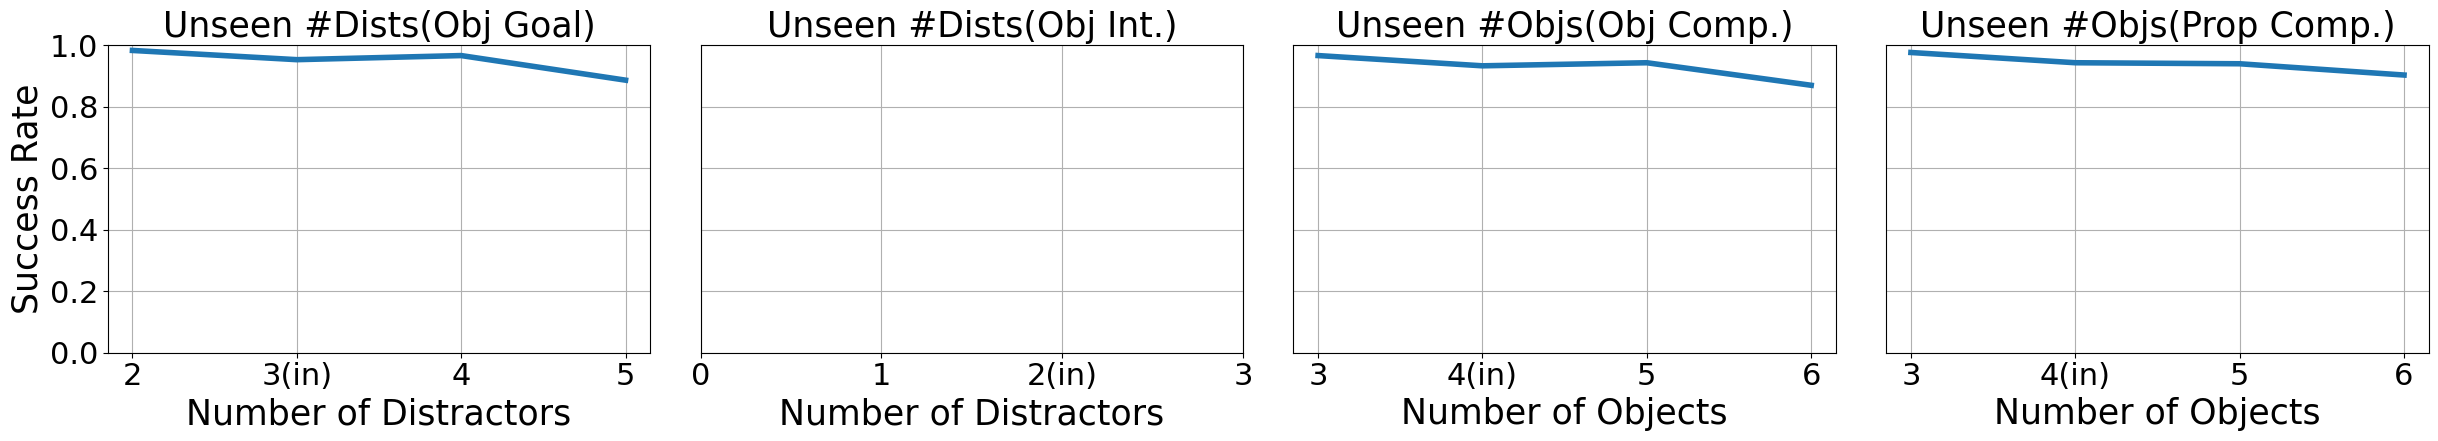

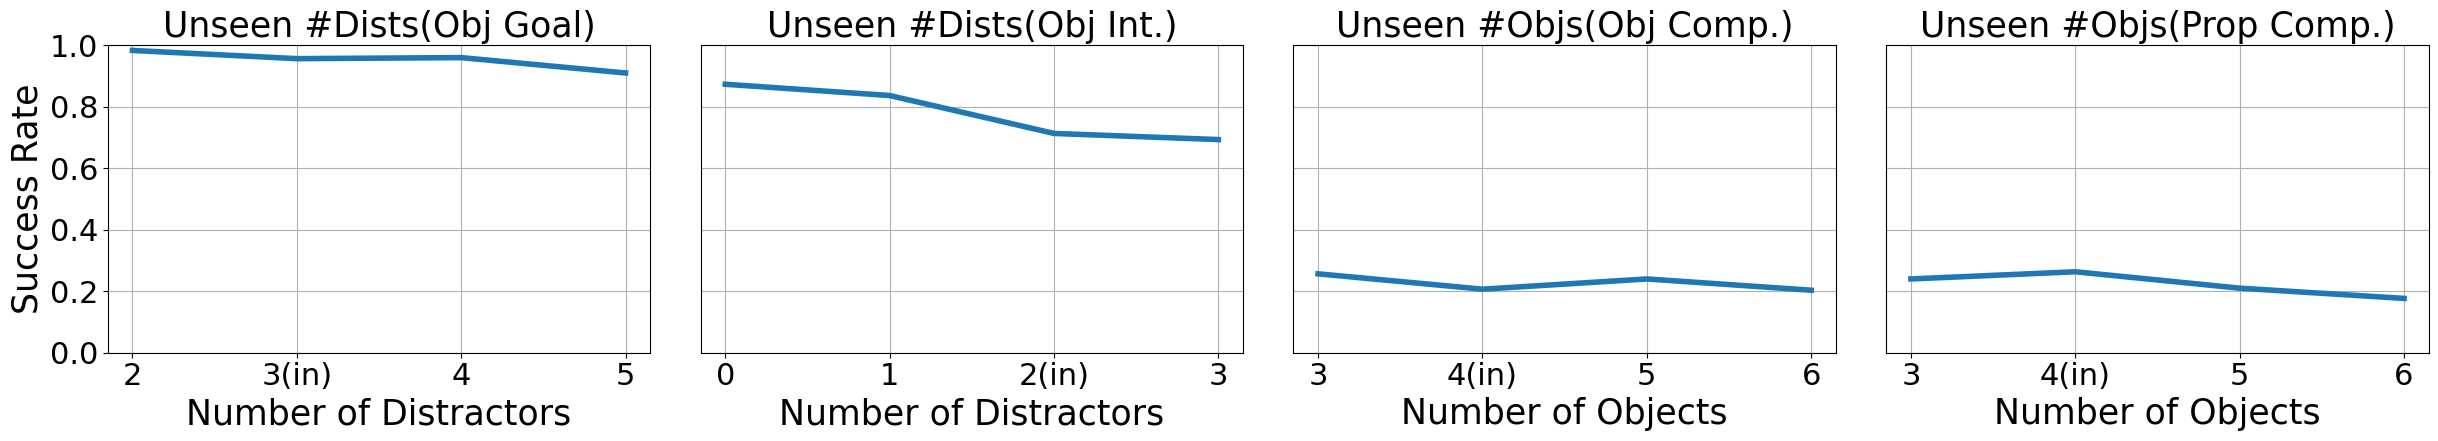

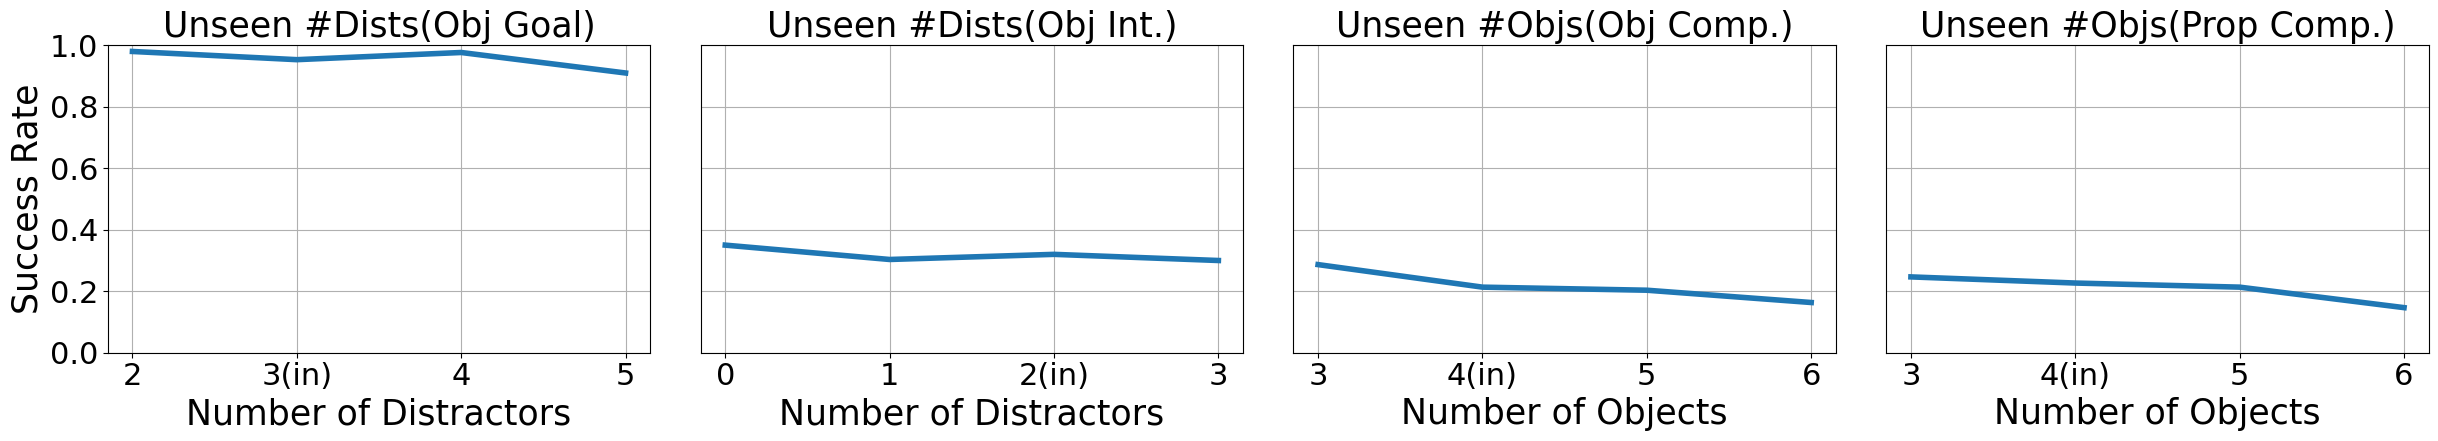

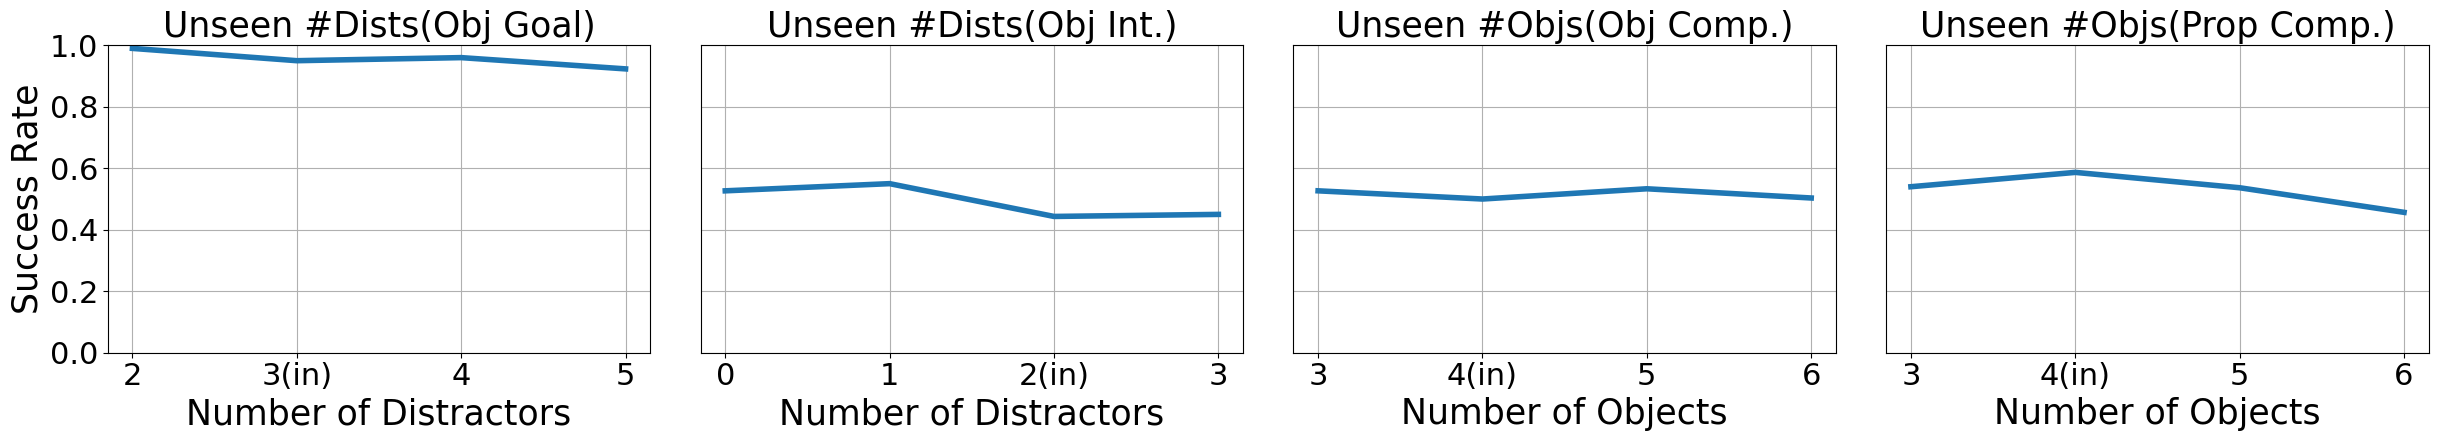

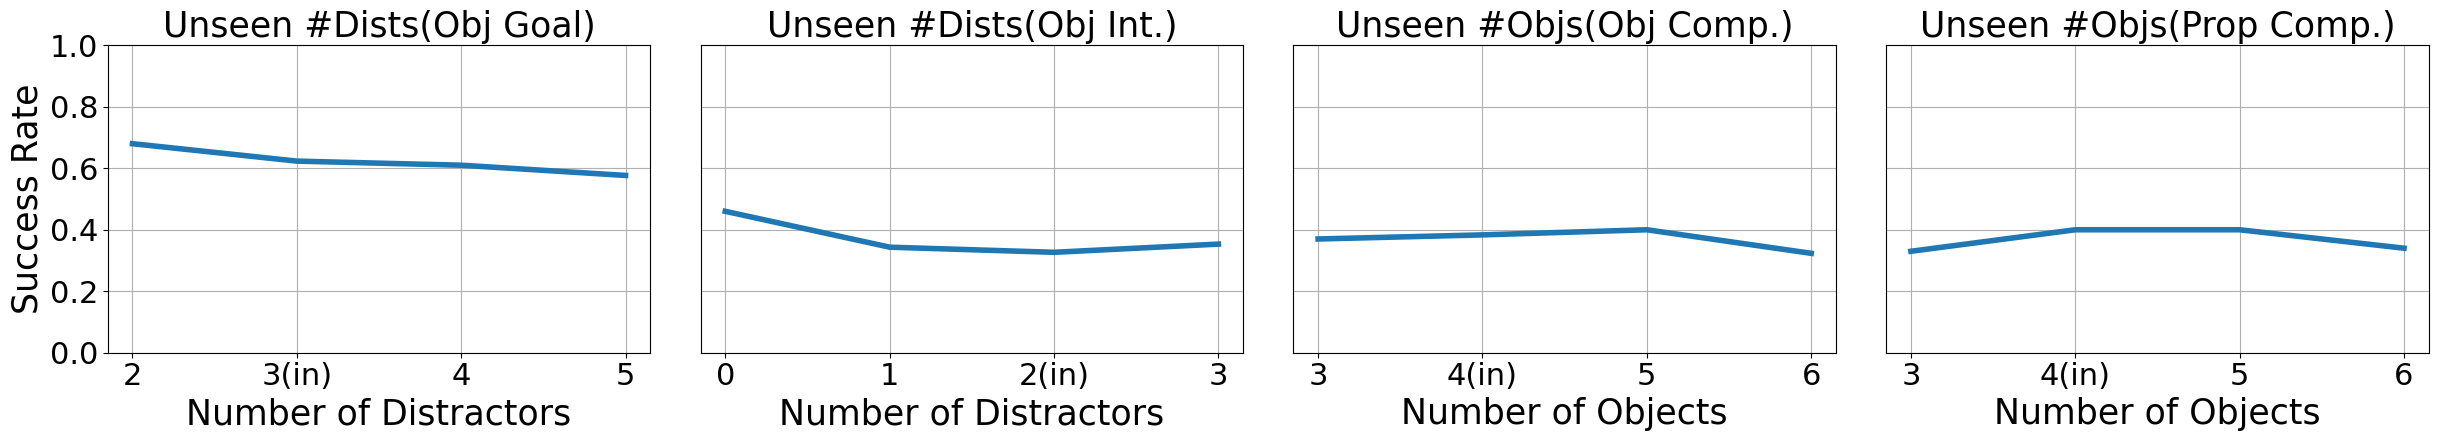

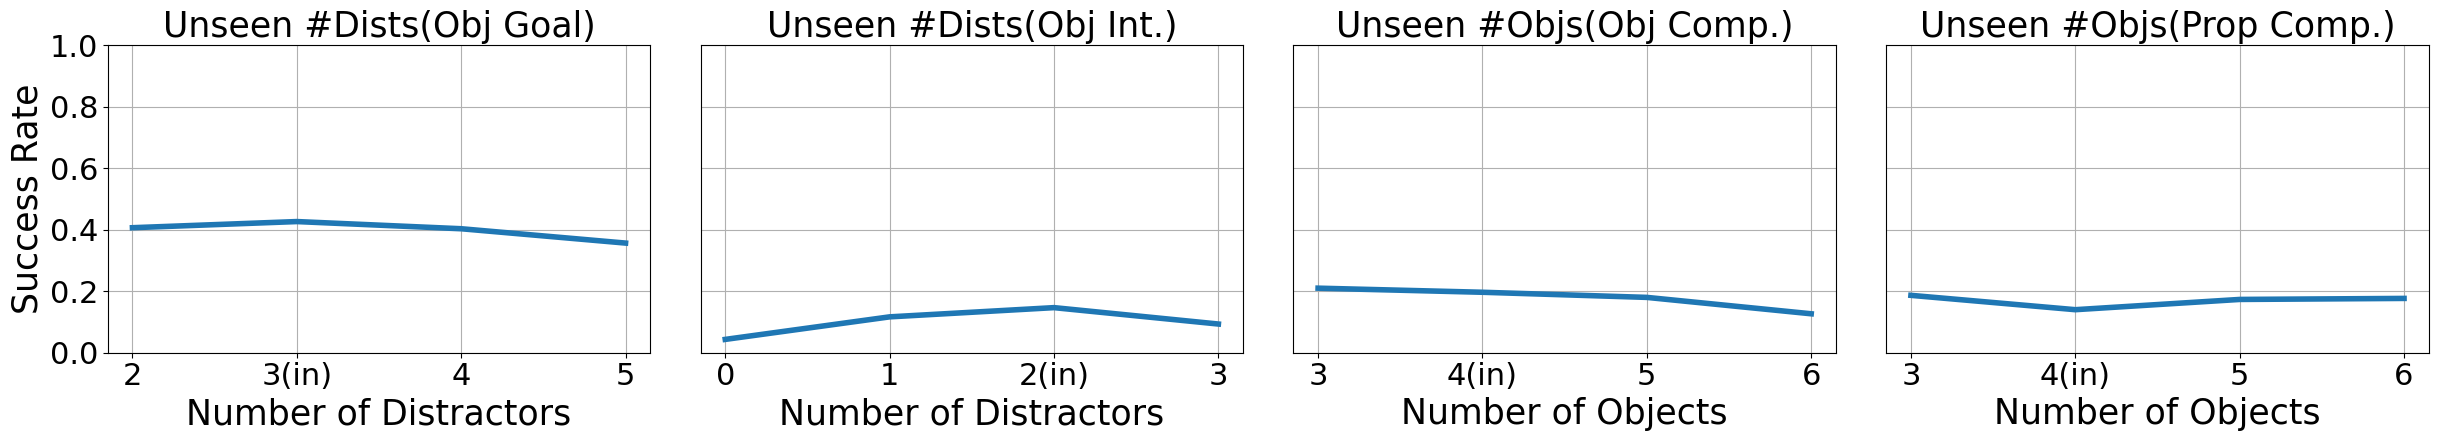

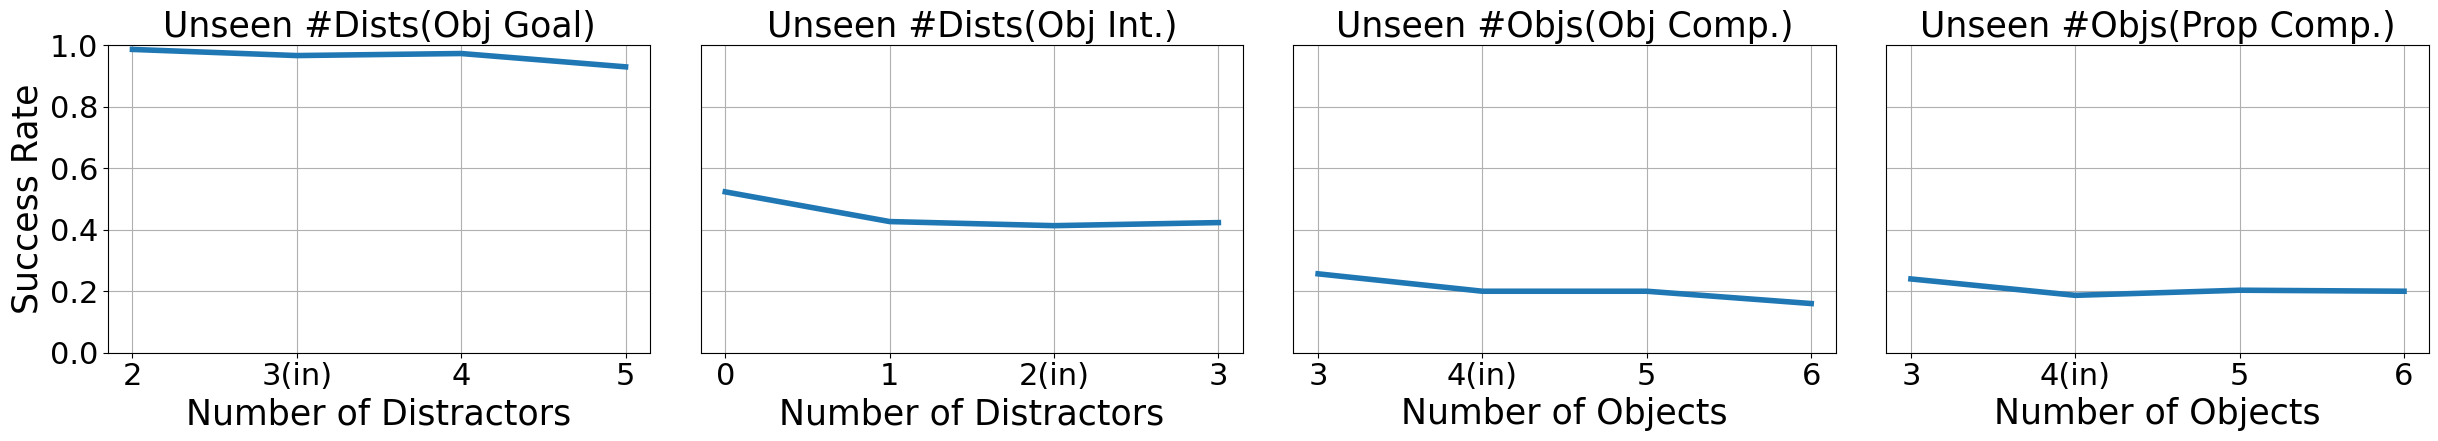

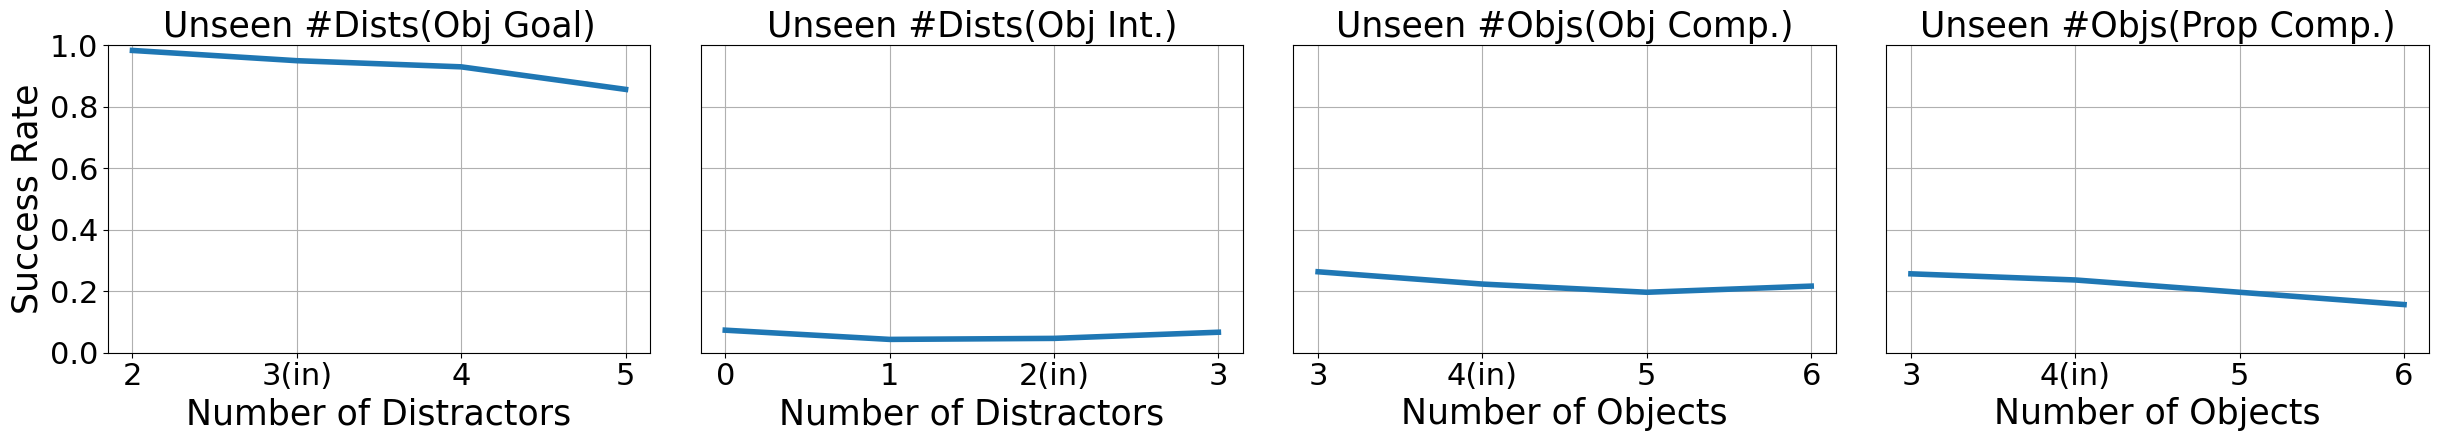

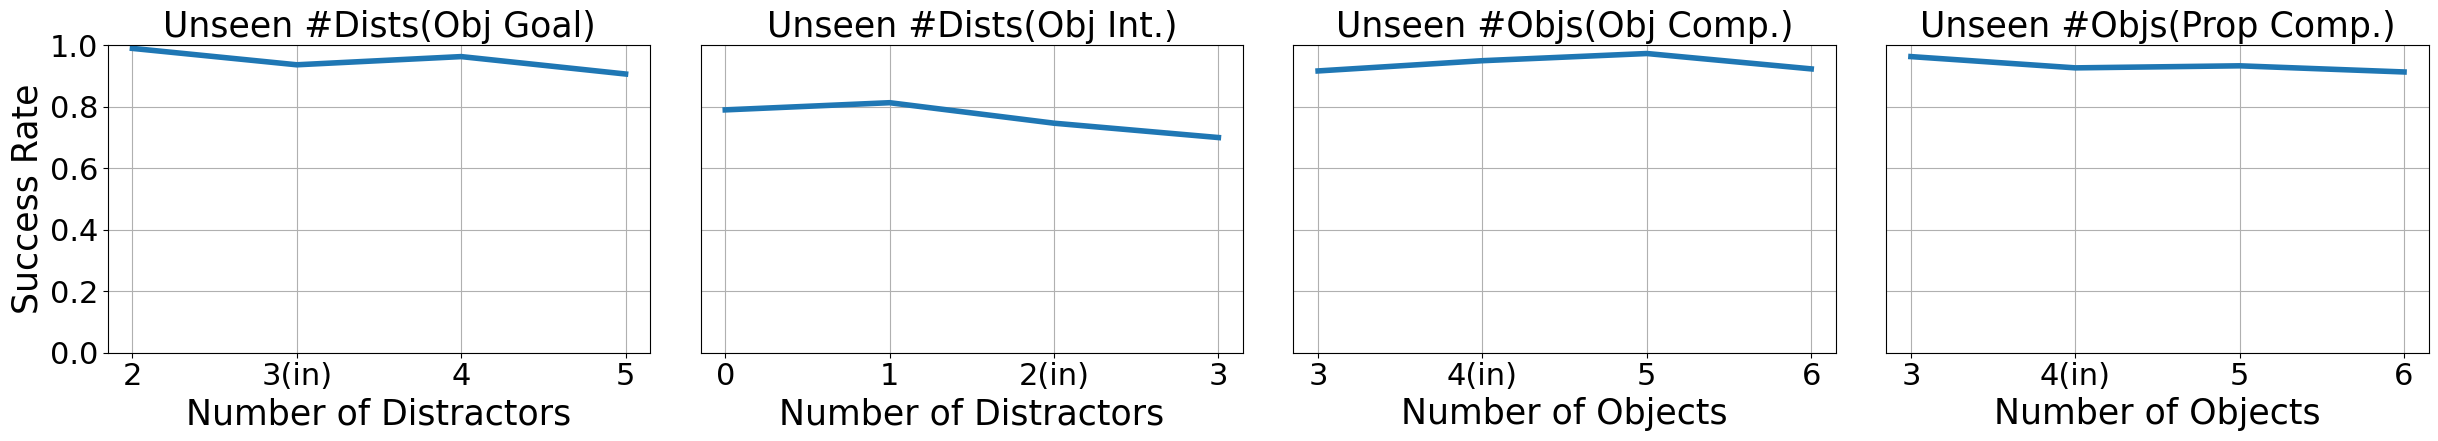

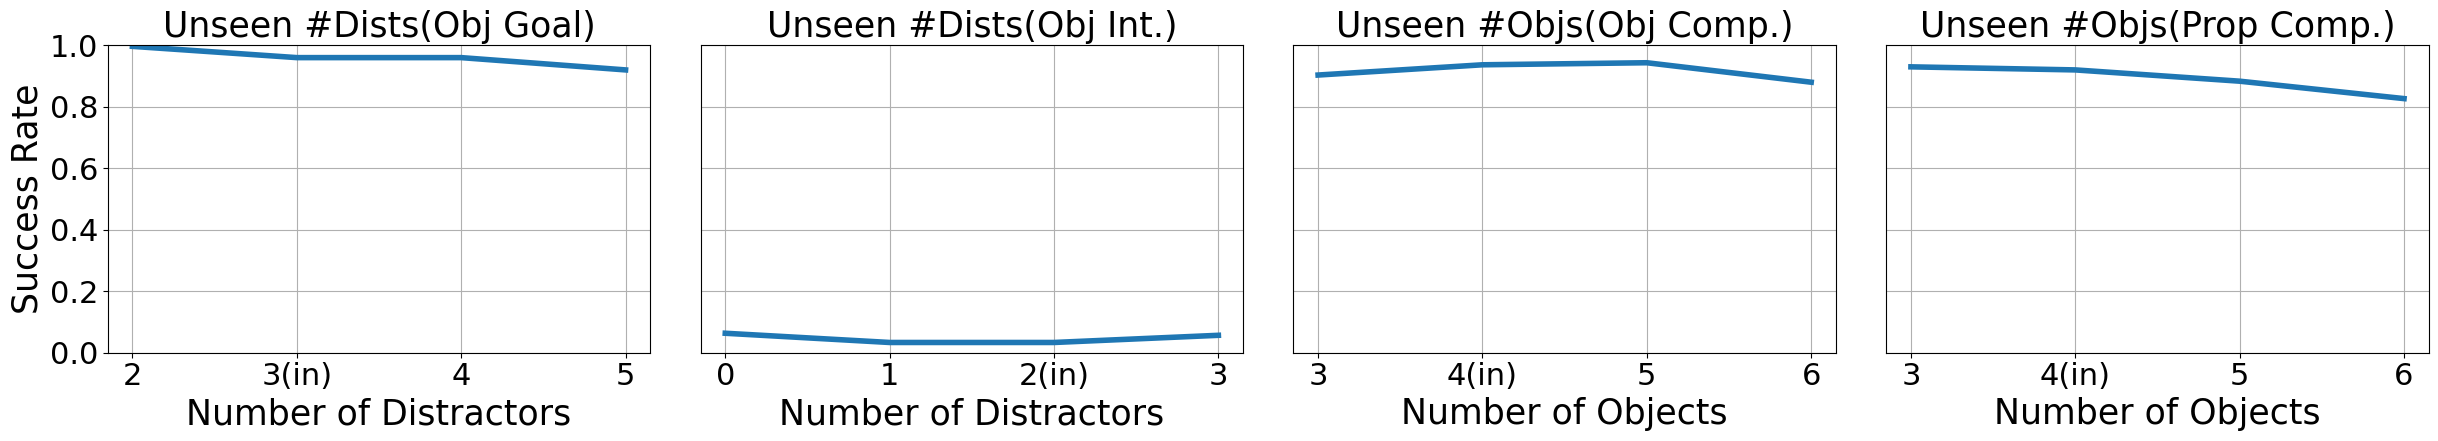

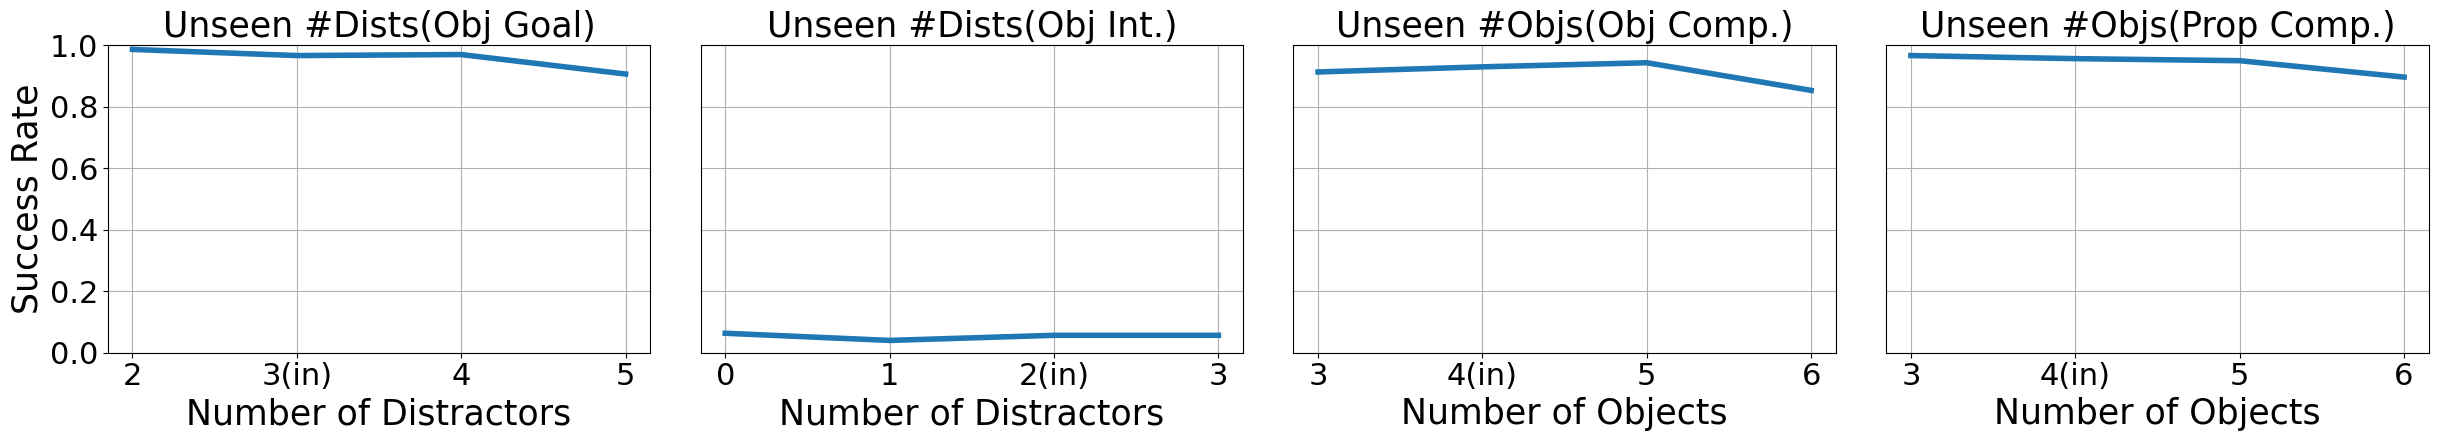

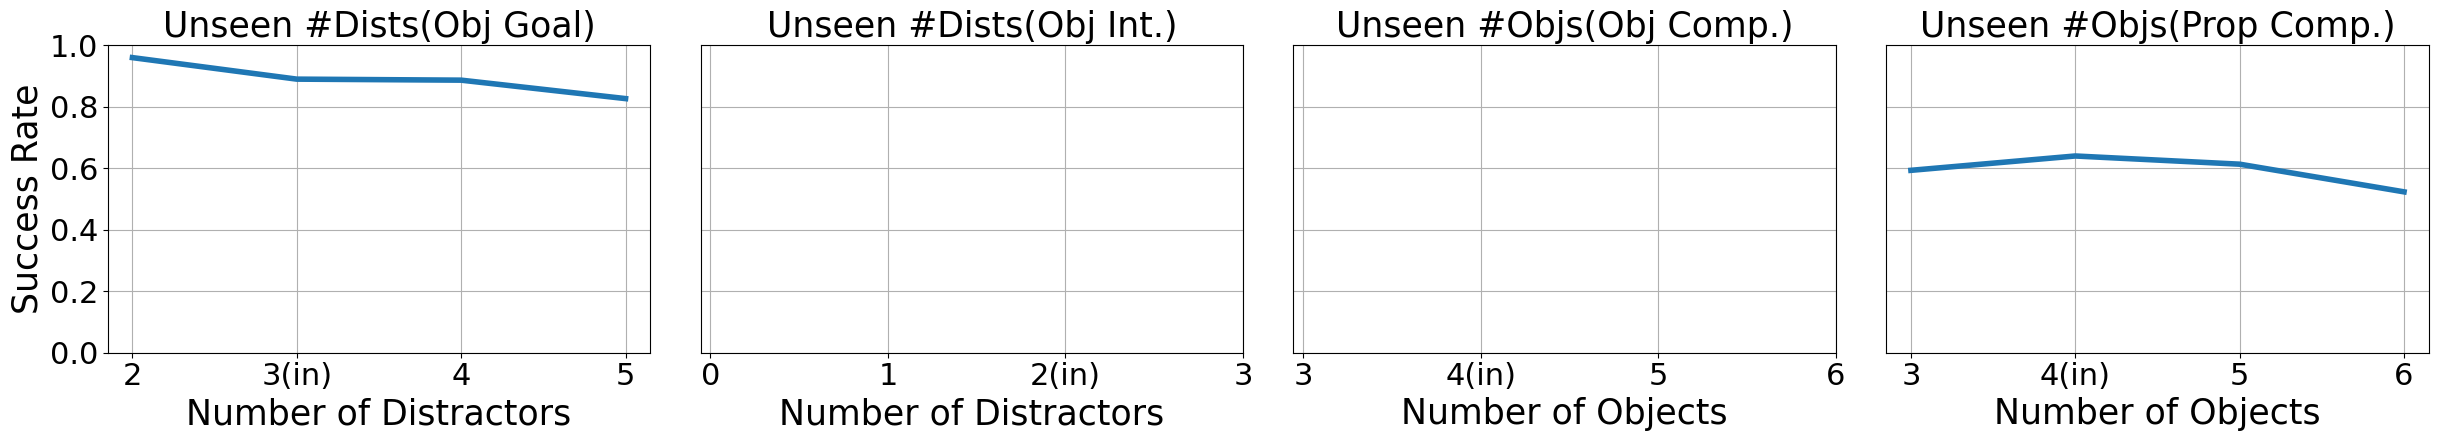

In [16]:
# colormap
cm = plt.cm.get_cmap("tab20").colors

for model_i, model_name in enumerate(models.keys()):
    # plots
    shape = (1,4)
    top = 0.12
    hspace = 0.12
    bottom = 0.2 if shape[0] != 1 else 0.35
    height = (1 - top - bottom - hspace * (shape[0] - 1)) / shape[0]
    left = 0.054
    #wspace = 0.048
    wspace = 0.02
    right = 0.025
    width = (1 - left - right - wspace * (shape[1] - 1)) / shape[1]
    recs = np.zeros(shape, dtype=object)
    for i in range(recs.shape[0]):
        for j in range(recs.shape[1]):
            recs[i, j] = [
                left + j * (width + wspace),  # left
                bottom + (recs.shape[0] - 1 - i) * (height + hspace),  # bottom
                width,
                height,
            ]
    plt.figure(figsize=(6.3 * recs.shape[1], 5.8 * recs.shape[0]))
    for env_i, env_name in enumerate(env_names[0]):
        ax = plt.axes(recs[0, env_i])
        _results = results[env_name][model_name]
        if env_name == "Unseen #Dists(Obj Goal)":
            _x = ["2", "3(in)", "4", "5"]
            _x_name = "Number of Distractors"
        elif env_name == "Unseen #Dists(Obj Int.)":
            _x = ["0", "1", "2(in)", "3"]
            _x_name = "Number of Distractors"
        elif env_name == "Unseen #Objs(Obj Comp.)":
            _x = ["3", "4(in)", "5", "6"]
            _x_name = "Number of Objects"
        elif env_name == "Unseen #Objs(Prop Comp.)":
            _x = ["3", "4(in)", "5", "6"]
            _x_name = "Number of Objects"
        elif env_name == "Unseen Colors(Obj Goal)": 
            _x = ["0(in)", "1", "2", "3"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Obj Int.)":
            _x = ["0(in)", "1", "2", "3"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Obj Comp.)":
            _x = ["0(in)", "1", "2"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Prop Comp.)":
            _x = ["0(in)", "1", "2"]
            _x_name = "Number of Unseen Colors"
        _y = _results["mean"]
        line = ax.errorbar(_x, _y, linewidth=4, color=cm[0], label=model_name)
        ax.grid(True)
        axes = plt.gca()
        ax.set_xlabel(_x_name, fontsize=25)
        plt.xticks(_x, fontsize=22)
        ax.set_ylim([0.0, 1.0])
        plt.yticks(fontsize=22)
        if env_i == 0:
            ax.set_ylabel("Success Rate", fontsize=25)
        else:
            ax.yaxis.set_ticklabels([])
            ax.yaxis.set_ticks_position("none")
        ax.set_title(env_name, fontsize=25)
    plt.savefig(f"icml_{model_name}_ood_unseen_num.png")

GT Unseen Colors(Obj Goal) [0.9533333333333333, 0.9366666666666666, 0.9, 0.93]
GT Unseen Colors(Obj Int.) [0.8366666666666666, 0.7999999999999999, 0.7399999999999999, 0.7466666666666667]
GT Unseen Colors(Obj Comp.) [0.9333333333333335, 0.48, 0.18333333333333335]
GT Unseen Colors(Prop Comp.) [0.9433333333333334, 0.6633333333333333, 0.29333333333333333]
Cnn Unseen Colors(Obj Goal) [0.9566666666666667, 0.96, 0.96, 0.96]
Cnn Unseen Colors(Obj Int.) [0.7133333333333333, 0.6933333333333334, 0.6966666666666667, 0.6833333333333335]
Cnn Unseen Colors(Obj Comp.) [0.20666666666666667, 0.21333333333333335, 0.20333333333333334]
Cnn Unseen Colors(Prop Comp.) [0.26333333333333336, 0.15666666666666668, 0.22]
CnnFeat Unseen Colors(Obj Goal) [0.9533333333333333, 0.9533333333333333, 0.9533333333333333, 0.9499999999999998]
CnnFeat Unseen Colors(Obj Int.) [0.32, 0.30666666666666664, 0.31, 0.3]
CnnFeat Unseen Colors(Obj Comp.) [0.21333333333333335, 0.2333333333333333, 0.20333333333333334]
CnnFeat Unseen Col

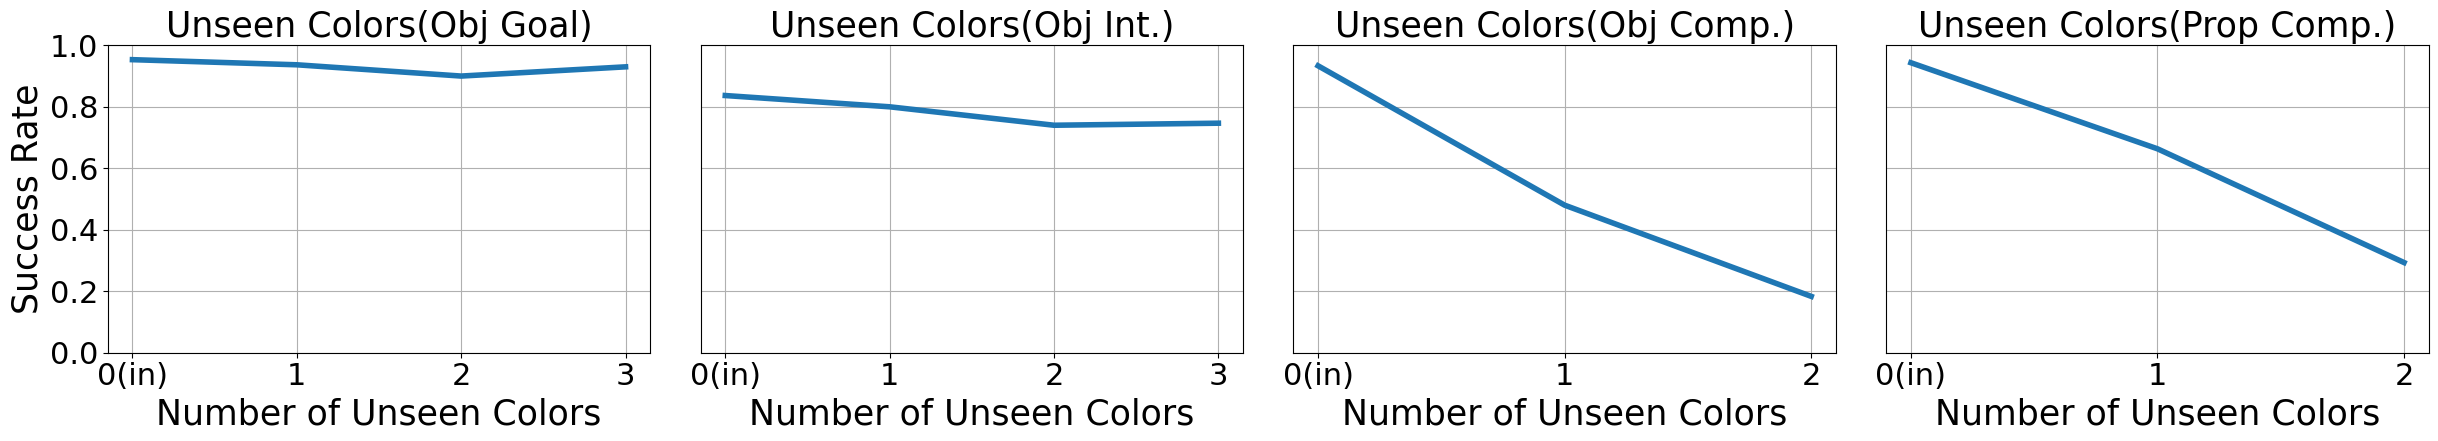

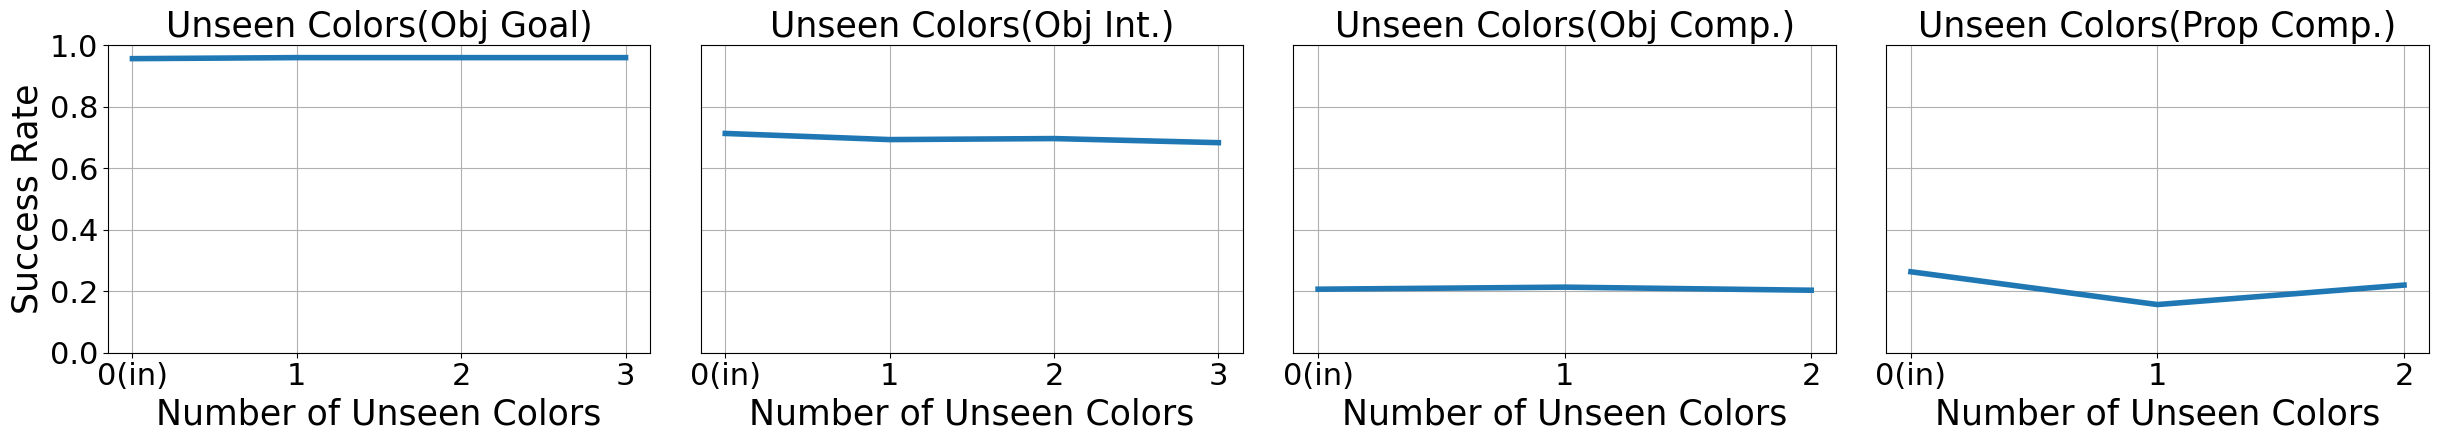

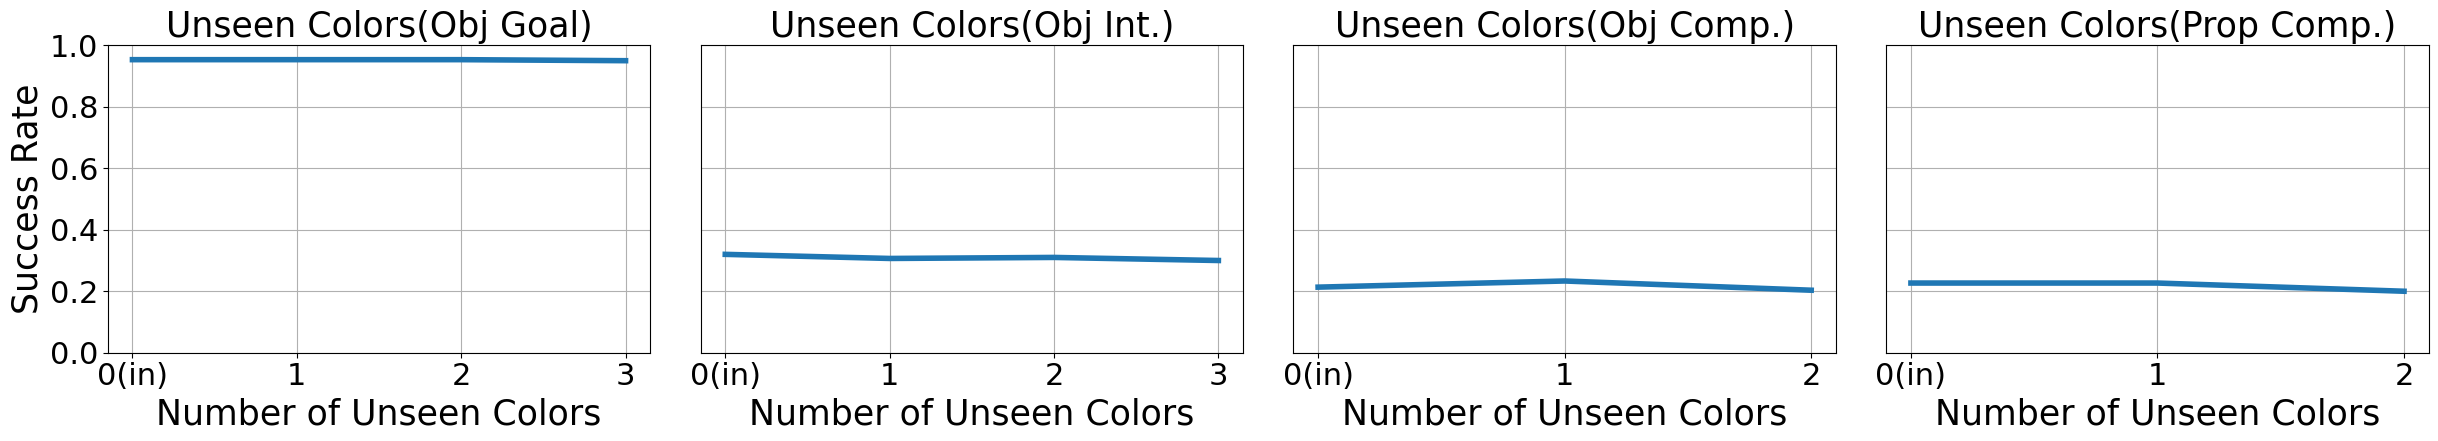

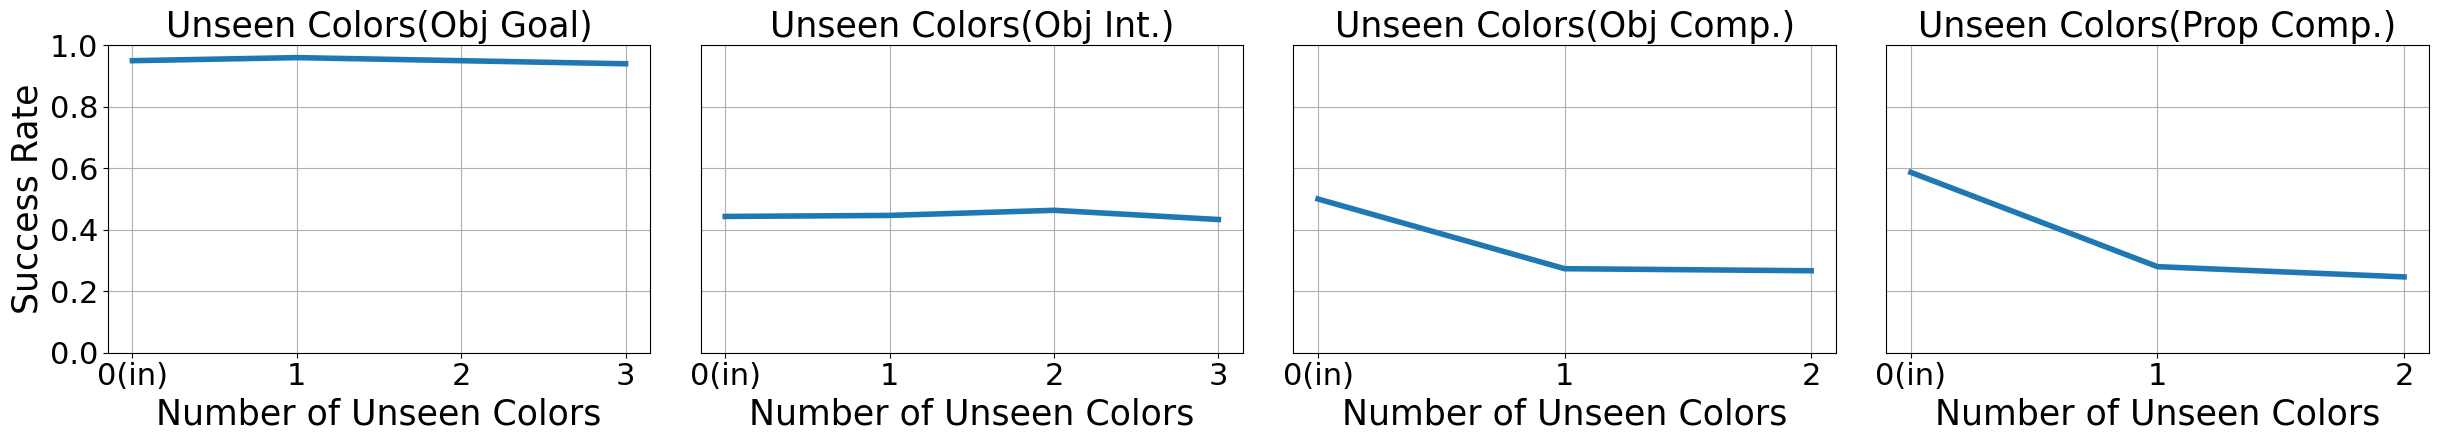

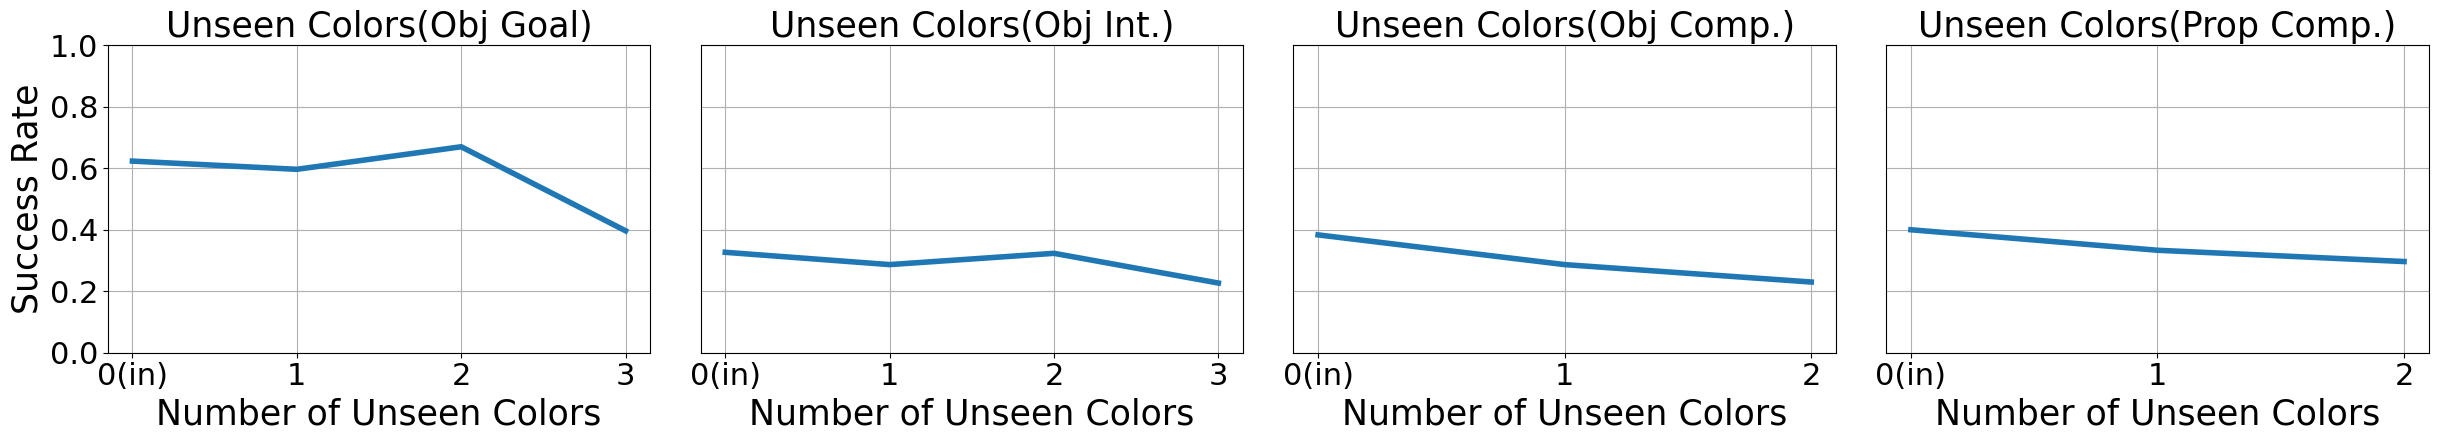

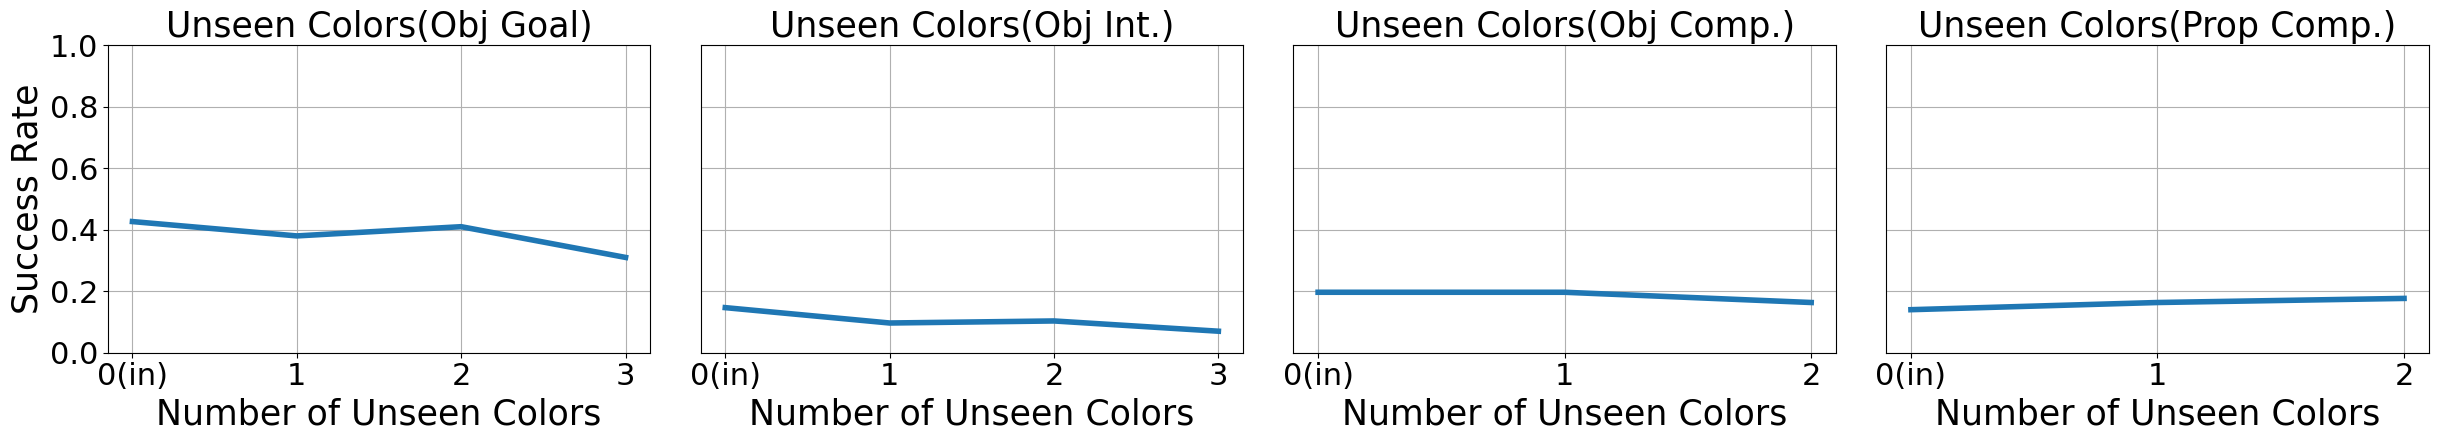

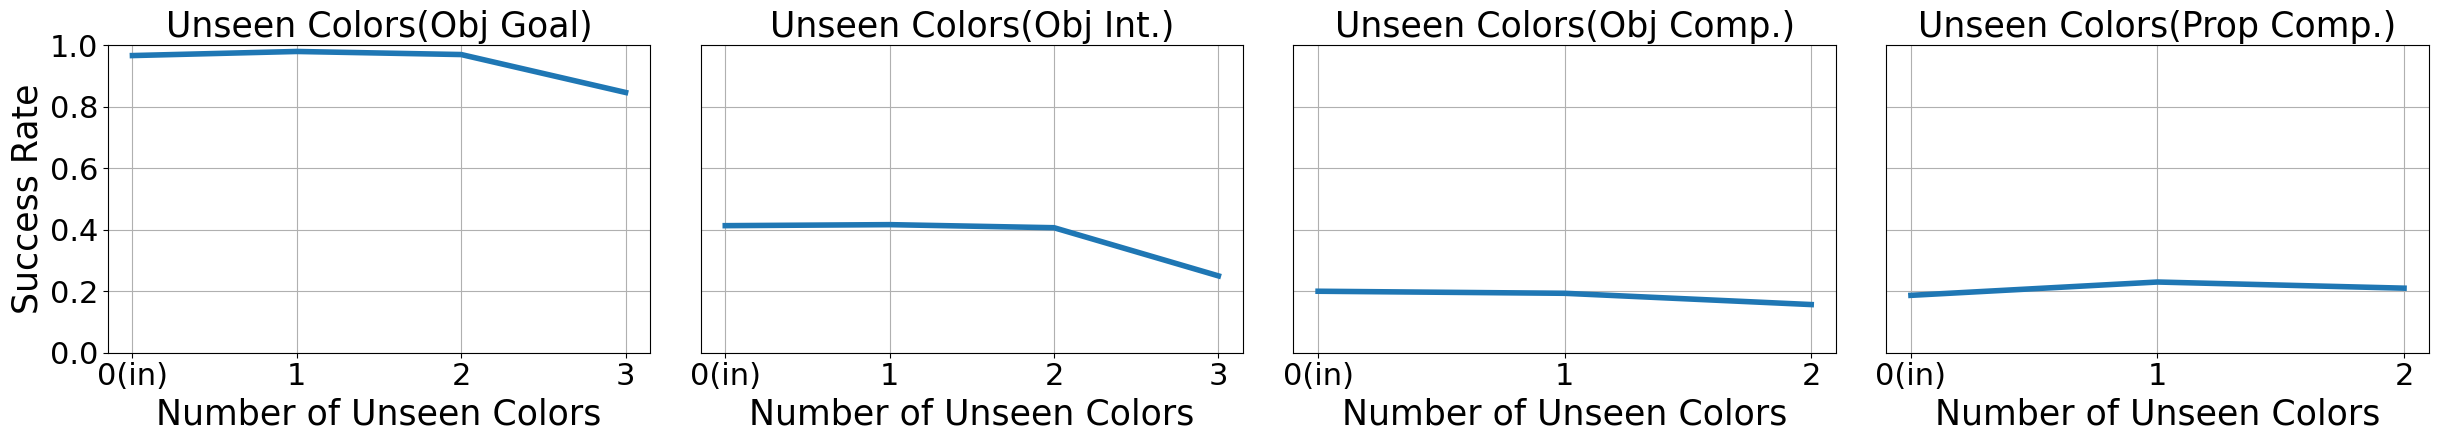

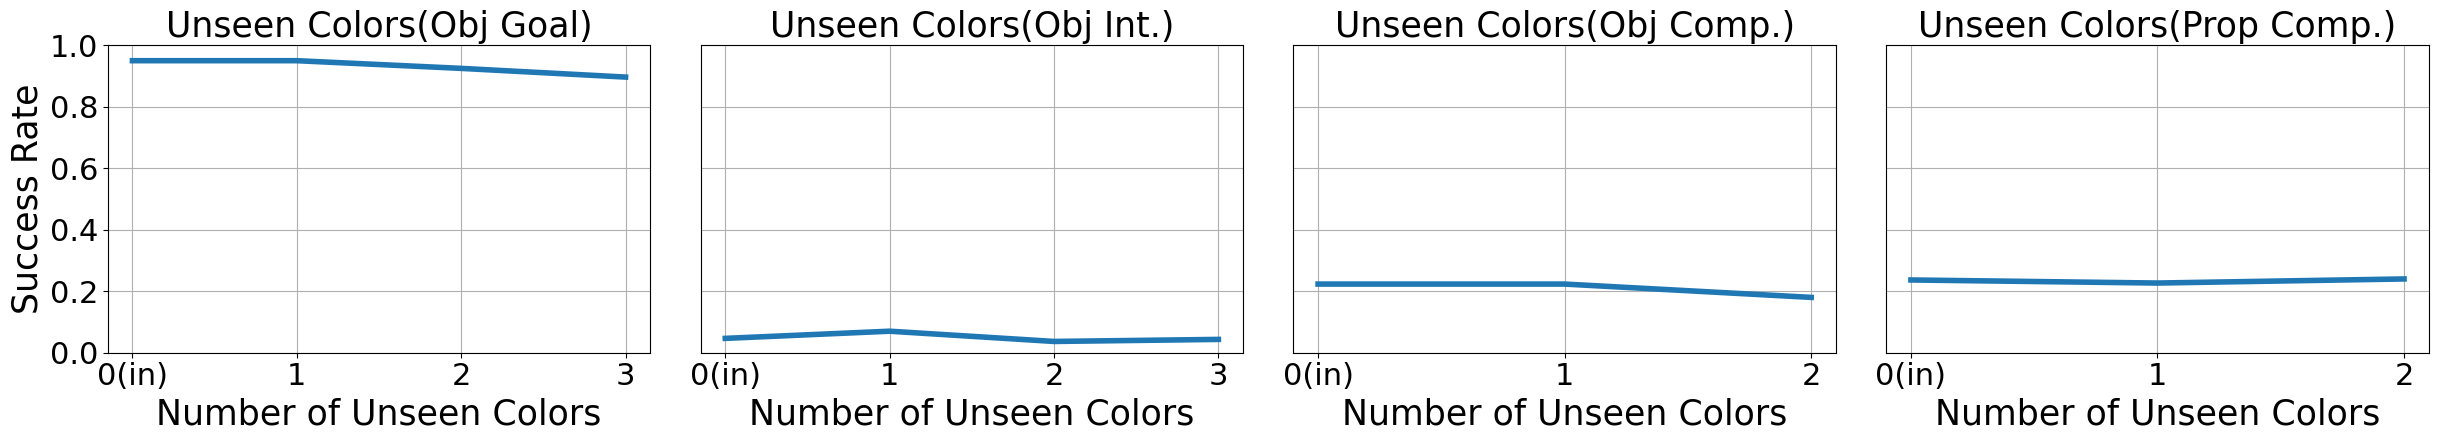

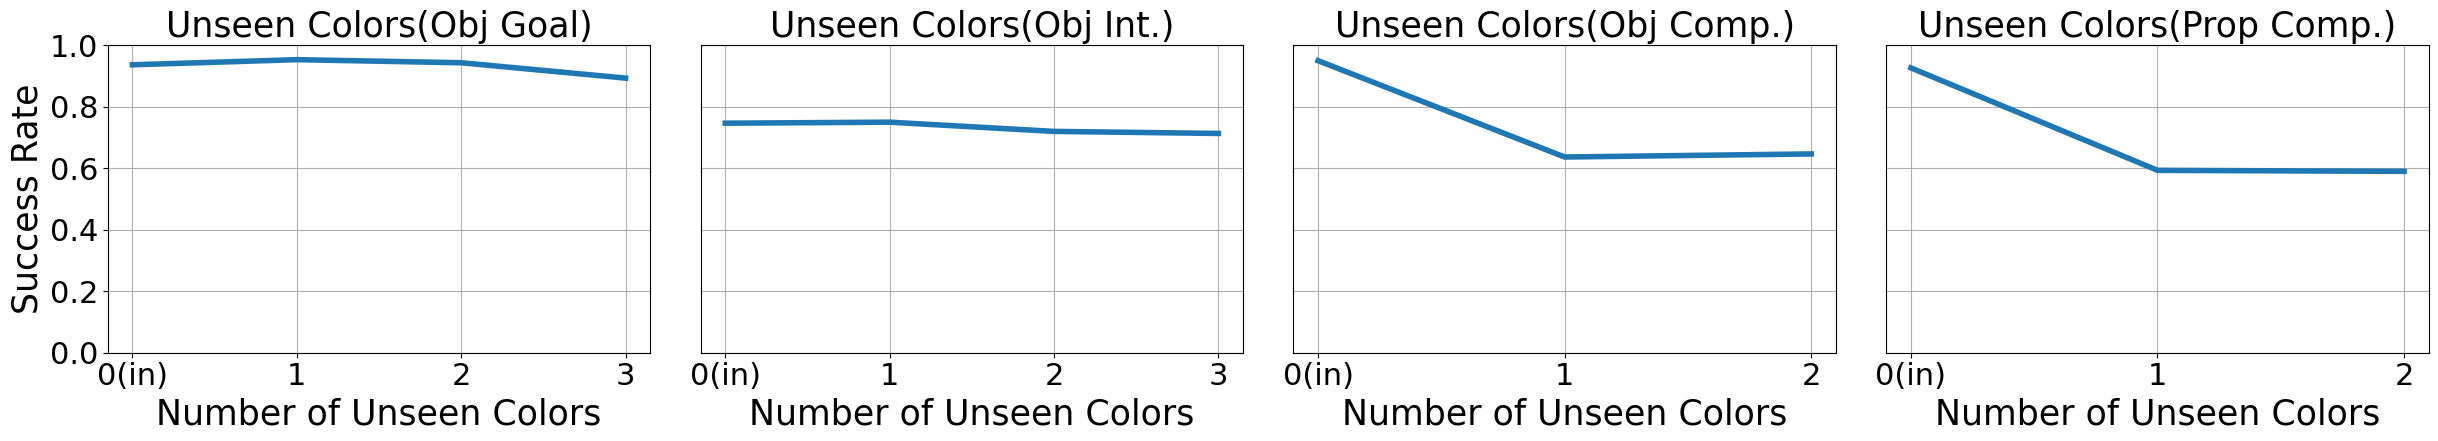

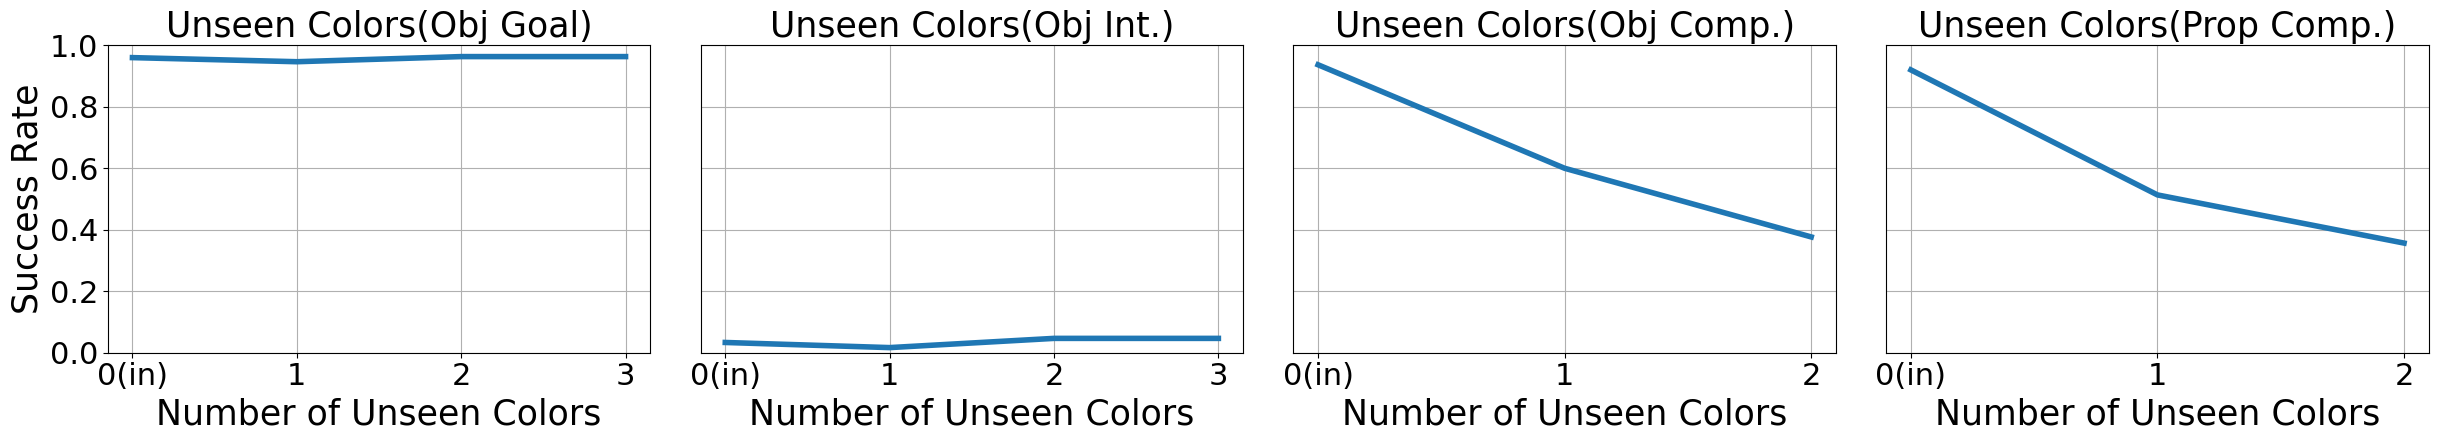

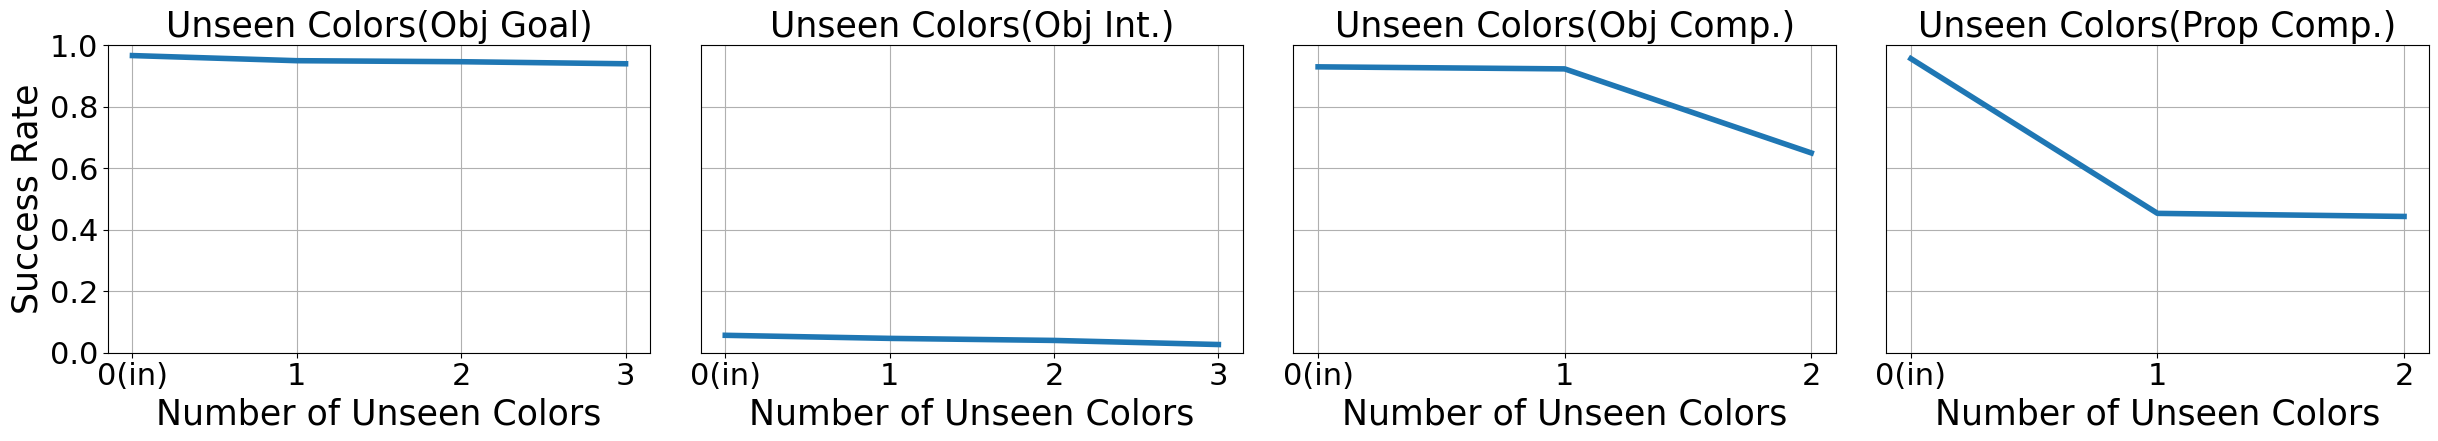

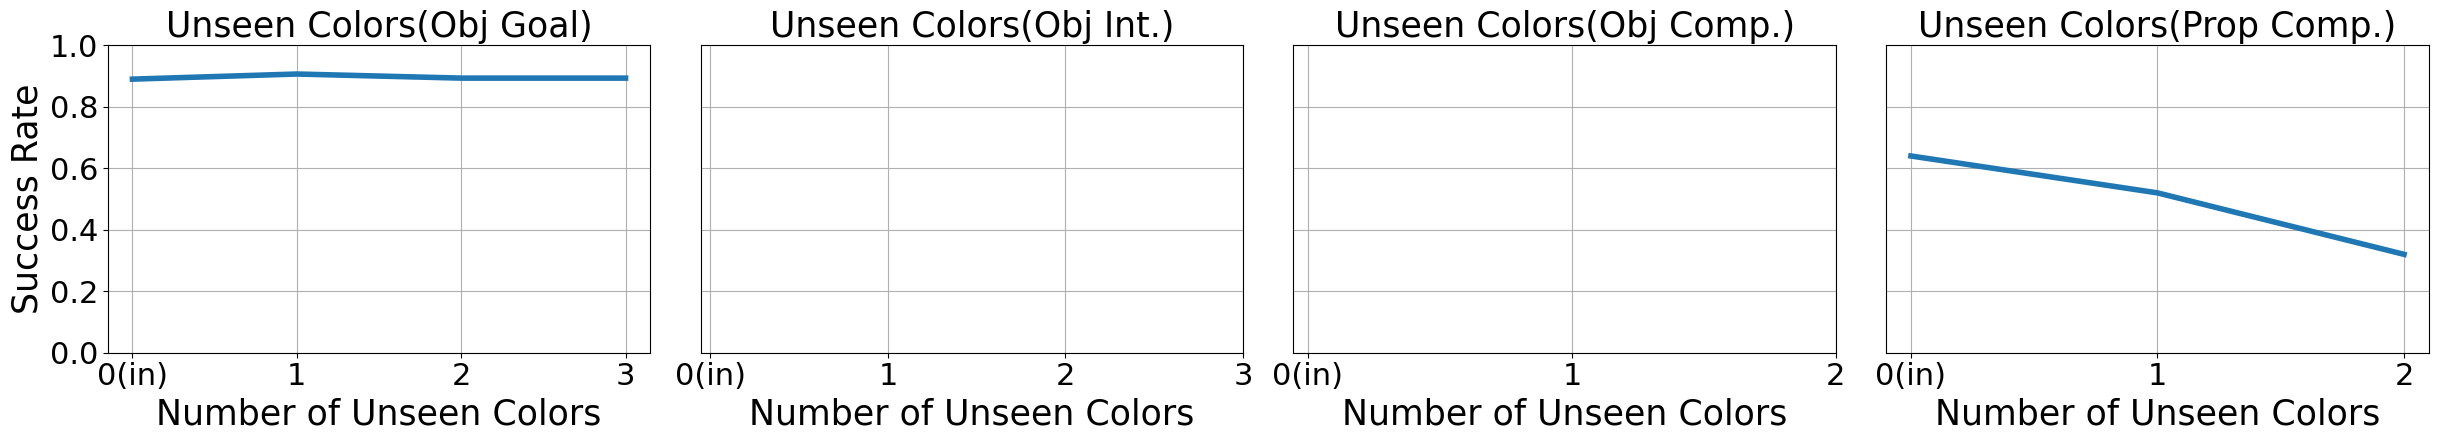

In [17]:
# colormap
cm = plt.cm.get_cmap("tab20").colors

for model_i, model_name in enumerate(models.keys()):
    # plots
    shape = (1,4)
    top = 0.12
    hspace = 0.12
    bottom = 0.2 if shape[0] != 1 else 0.35
    height = (1 - top - bottom - hspace * (shape[0] - 1)) / shape[0]
    left = 0.054
    #wspace = 0.048
    wspace = 0.02
    right = 0.025
    width = (1 - left - right - wspace * (shape[1] - 1)) / shape[1]
    recs = np.zeros(shape, dtype=object)
    for i in range(recs.shape[0]):
        for j in range(recs.shape[1]):
            recs[i, j] = [
                left + j * (width + wspace),  # left
                bottom + (recs.shape[0] - 1 - i) * (height + hspace),  # bottom
                width,
                height,
            ]
    plt.figure(figsize=(6.3 * recs.shape[1], 5.8 * recs.shape[0]))
    for env_i, env_name in enumerate(env_names[1]):
        ax = plt.axes(recs[0, env_i])
        _results = results[env_name][model_name]
        if env_name == "Unseen #Dists(Obj Goal)":
            _x = ["2", "3(in)", "4", "5"]
            _x_name = "Number of Distractors"
        elif env_name == "Unseen #Dists(Obj Int.)":
            _x = ["0", "1", "2(in)", "3"]
            _x_name = "Number of Distractors"
        elif env_name == "Unseen #Objs(Obj Comp.)":
            _x = ["3", "4(in)", "5", "6"]
            _x_name = "Number of Objects"
        elif env_name == "Unseen #Objs(Prop Comp.)":
            _x = ["3", "4(in)", "5", "6"]
            _x_name = "Number of Objects"
        elif env_name == "Unseen Colors(Obj Goal)": 
            _x = ["0(in)", "1", "2", "3"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Obj Int.)":
            _x = ["0(in)", "1", "2", "3"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Obj Comp.)":
            _x = ["0(in)", "1", "2"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Prop Comp.)":
            _x = ["0(in)", "1", "2"]
            _x_name = "Number of Unseen Colors"
        _y = _results["mean"]
        print(model_name, env_name, _y)
        line = ax.errorbar(_x, _y, linewidth=4, color=cm[0], label=model_name)
        ax.grid(True)
        axes = plt.gca()
        ax.set_xlabel(_x_name, fontsize=25)
        plt.xticks(_x, fontsize=22)
        ax.set_ylim([0.0, 1.0])
        plt.yticks(fontsize=22)
        if env_i == 0:
            ax.set_ylabel("Success Rate", fontsize=25)
        else:
            ax.yaxis.set_ticklabels([])
            ax.yaxis.set_ticks_position("none")
        ax.set_title(env_name, fontsize=25)
    plt.savefig(f"icml_{model_name}_ood_unseen_color.png")